In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = "./cleaned_train_data.csv"
data = pd.read_csv(file_path)

data.head()

,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [14]:
data.sentiment.value_counts()

joy         6743
sadness     5794
anger       2704
fear        2366
love        1628
surprise     713
Name: sentiment, dtype: int64

In [15]:
data = data.dropna(subset=['content'])

In [16]:
X = data['content'].astype(str)
y = data['sentiment']

le = LabelEncoder()
y = le.fit_transform(y)

vec = TfidfVectorizer()
X = vec.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

In [18]:
rfc = RandomForestClassifier(random_state=0 )

In [19]:
rfc.fit(X_train, y_train)
rf_pred = rfc.predict(X_test)

In [20]:
print(classification_report(y_test, rf_pred, zero_division='warn'))
confusion_m = confusion_matrix(y_test, rf_pred)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       539
           1       0.86      0.85      0.86       525
           2       0.88      0.93      0.91      1322
           3       0.83      0.75      0.79       302
           4       0.93      0.92      0.93      1159
           5       0.80      0.70      0.75       143

    accuracy                           0.89      3990
   macro avg       0.87      0.84      0.85      3990
weighted avg       0.89      0.89      0.89      3990



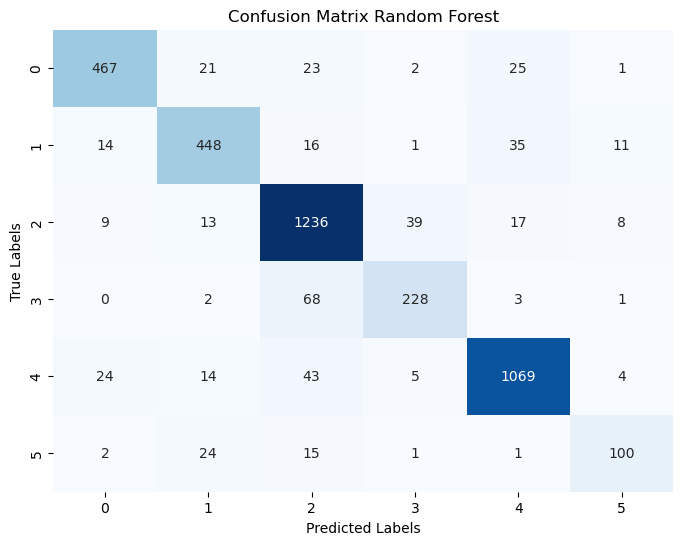

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [25]:
accuracy = accuracy_score(y_test, rf_pred) # accuracy
precision = precision_score(y_test, rf_pred, average='weighted') # precision 
recall = recall_score(y_test, rf_pred, average='weighted') # recall
f1 = f1_score(y_test, rf_pred, average='weighted') # f1

print("Name: ", "RF")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Name:  RF
Accuracy:  0.8892230576441102
Precision:  0.888706521419829
Recall:  0.8892230576441102
F1:  0.8884072539675077
